# Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

xls = pd.ExcelFile("/Users/ibolam/99. Projects/Abroad/01. UMD/25SPRING/25DATATHON/Spotify_Daily_Top_50.xlsx")

In [3]:
df_list = []
for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    df["sheet_name"] = sheet_name
    df_list.append(df)

df = pd.concat(df_list, ignore_index=True)

print(df.shape)

(1667119, 29)


In [4]:
df = df[df['sheet_name'] != 'Dictionary']
df = df.drop(columns=['Key', 'Description', 'Data Type'])
df

,sheet_name,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
25,page_1,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",1.0,0.0,1.0,NaN,2025-01-31,100.0,...,6.0,-7.777,0.0,0.0304,0.3080,0.000000,0.1220,0.535,157.969,3.0
26,page_1,3sK8wGT43QFpWrvNQsrQya,DtMF,Bad Bunny,2.0,0.0,-1.0,NaN,2025-01-31,98.0,...,7.0,-27.405,0.0,0.0717,0.1770,0.218000,0.0807,0.032,136.020,4.0
27,page_1,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",3.0,0.0,0.0,NaN,2025-01-31,91.0,...,0.0,-4.477,0.0,0.2600,0.0283,0.000000,0.3550,0.939,149.027,4.0
28,page_1,2lTm559tuIvatlT1u0JYG2,BAILE INoLVIDABLE,Bad Bunny,4.0,0.0,0.0,NaN,2025-01-31,95.0,...,10.0,-46.113,1.0,0.0615,0.1920,0.790000,0.1120,0.219,119.387,3.0
29,page_1,5TFD2bmFKGhoCRbX61nXY5,NUEVAYoL,Bad Bunny,5.0,0.0,1.0,NaN,2025-01-31,94.0,...,6.0,-20.024,1.0,0.1390,0.2650,0.995000,0.2040,0.120,137.922,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667114,page_26,0AYt6NMyyLd0rLuvr0UkMH,Slime You Out (feat. SZA),"Drake, SZA",46.0,4.0,0.0,AE,2023-10-18,84.0,...,5.0,-9.243,0.0,0.0502,0.5080,0.000000,0.2590,0.105,88.880,3.0
1667115,page_26,2Gk6fi0dqt91NKvlzGsmm7,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47.0,3.0,0.0,AE,2023-10-18,80.0,...,10.0,-5.060,1.0,0.0452,0.0585,0.000000,0.1320,0.476,121.879,4.0
1667116,page_26,26b3oVLrRUaaybJulow9kz,People,Libianca,48.0,2.0,0.0,AE,2023-10-18,88.0,...,10.0,-7.621,0.0,0.0678,0.5510,0.000013,0.1020,0.693,124.357,5.0
1667117,page_26,5ydjxBSUIDn26MFzU3asP4,Rainy Days,V,49.0,1.0,0.0,AE,2023-10-18,88.0,...,9.0,-8.016,0.0,0.0875,0.7390,0.000000,0.1480,0.282,74.828,4.0


In [5]:
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])

df['artists'] = df['artists'].str.split(', ')

# df = df[df['is_explicit'] == False] # why?

artist_counts = df.explode('artists')['artists'].value_counts()
print(artist_counts.head(10))

artists
Feid                 46774
Bad Bunny            41711
Billie Eilish        27328
KAROL G              27221
Sabrina Carpenter    25042
Taylor Swift         21681
Peso Pluma           19618
Bruno Mars           17479
The Weeknd           16500
Myke Towers          15684
Name: count, dtype: int64


In [9]:
adf = pd.DataFrame(artist_counts)
adf

,count
artists,
Feid,46774
Bad Bunny,41711
Billie Eilish,27328
KAROL G,27221
Sabrina Carpenter,25042
...,...
Myspro,1
Big Time Rush,1
Jimmy De Ville,1


In [11]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10445 entries, Feid to Jozzu RD
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   10445 non-null  int64
dtypes: int64(1)
memory usage: 421.2+ KB


# Exploratory Data Analysis

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = "/Users/ibolam/99. Projects/Abroad/01. UMD/25SPRING/25DATATHON/spotify_top50_cleaned.csv"

cdf = pd.read_csv(file)


In [68]:
cdf.head(20)

,sheet_name,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,page_1,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"['Lady Gaga', 'Bruno Mars']",1.0,0.0,1.0,NaN,2025-01-31,100.0,...,6.0,-7.777,0.0,0.0304,0.30800,0.000000,0.1220,0.535,157.969,3.0
1,page_1,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"['ROSÉ', 'Bruno Mars']",3.0,0.0,0.0,NaN,2025-01-31,91.0,...,0.0,-4.477,0.0,0.2600,0.02830,0.000000,0.3550,0.939,149.027,4.0
2,page_1,5TFD2bmFKGhoCRbX61nXY5,NUEVAYoL,['Bad Bunny'],5.0,0.0,1.0,NaN,2025-01-31,94.0,...,6.0,-20.024,1.0,0.1390,0.26500,0.995000,0.2040,0.120,137.922,4.0
3,page_1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,['Billie Eilish'],6.0,0.0,-1.0,NaN,2025-01-31,96.0,...,2.0,-10.171,1.0,0.0358,0.20000,0.060800,0.1170,0.438,104.978,4.0
4,page_1,7tI8dRuH2Yc6RuoTjxo4dU,Who,['Jimin'],9.0,0.0,2.0,NaN,2025-01-31,90.0,...,0.0,-3.743,0.0,0.0320,0.00289,0.000000,0.1930,0.838,116.034,4.0
5,page_1,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),"['Kendrick Lamar', 'SZA']",11.0,0.0,-1.0,NaN,2025-01-31,88.0,...,2.0,-7.546,1.0,0.1250,0.25100,0.000000,0.2480,0.576,138.008,4.0
6,page_1,2262bWmqomIaJXwCRHr13j,Sailor Song,['Gigi Perez'],15.0,0.0,-1.0,NaN,2025-01-31,93.0,...,11.0,-10.432,1.0,0.0254,0.68200,0.000067,0.1930,0.273,94.938,4.0
7,page_1,3QaPy1KgI7nu9FJEQUgn6h,WILDFLOWER,['Billie Eilish'],17.0,1.0,0.0,NaN,2025-01-31,92.0,...,6.0,-12.002,0.0,0.0431,0.61200,0.000271,0.1700,0.126,148.101,4.0
8,page_1,2zOmS55knKWSgScYPTNmGQ,Sports car,['Tate McRae'],19.0,-2.0,31.0,NaN,2025-01-31,82.0,...,11.0,-3.685,0.0,0.0346,0.05420,0.000685,0.0946,0.874,106.986,4.0
9,page_1,5WEF0icHWmAZBBMglBd599,WELTiTA,"['Bad Bunny', 'Chuwi']",20.0,0.0,-4.0,NaN,2025-01-31,91.0,...,4.0,-32.354,0.0,0.6000,0.86600,0.329000,0.3460,0.357,96.140,3.0


In [69]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121511 entries, 0 to 1121510
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   sheet_name          1121511 non-null  object 
 1   spotify_id          1121511 non-null  object 
 2   name                1121502 non-null  object 
 3   artists             1121504 non-null  object 
 4   daily_rank          1121511 non-null  float64
 5   daily_movement      1121511 non-null  float64
 6   weekly_movement     1121511 non-null  float64
 7   country             1107409 non-null  object 
 8   snapshot_date       1121511 non-null  object 
 9   popularity          1121511 non-null  float64
 10  is_explicit         1121511 non-null  bool   
 11  duration_ms         1121511 non-null  float64
 12  album_name          1120704 non-null  object 
 13  album_release_date  1120875 non-null  object 
 14  danceability        1121511 non-null  float64
 15  energy         

In [70]:
# cdf[(cdf['snapshot_date'] == '2025-01-31') | (cdf['snapshot_date'] == '2025-01-30')]

cols = list(cdf.columns)
idx = cols.index('snapshot_date')
cols.remove('album_release_date')

cols.insert(idx + 1, 'album_release_date')

cdf = cdf[cols]

In [71]:

cdf['snapshot_date'] = pd.to_datetime(cdf['snapshot_date'])
cdf['album_release_date'] = pd.to_datetime(cdf['album_release_date'])
cdf['snapshot_release_date']= cdf['snapshot_date'] - cdf['album_release_date']

cols = list(cdf.columns)
cols.remove('snapshot_release_date')

idx = cols.index('snapshot_date')

cols.insert(idx, 'snapshot_release_date')

cdf = cdf[cols]
cdf

,sheet_name,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_release_date,snapshot_date,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,page_1,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"['Lady Gaga', 'Bruno Mars']",1.0,0.0,1.0,NaN,168 days,2025-01-31,...,6.0,-7.777,0.0,0.0304,0.30800,0.000000,0.1220,0.535,157.969,3.0
1,page_1,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"['ROSÉ', 'Bruno Mars']",3.0,0.0,0.0,NaN,56 days,2025-01-31,...,0.0,-4.477,0.0,0.2600,0.02830,0.000000,0.3550,0.939,149.027,4.0
2,page_1,5TFD2bmFKGhoCRbX61nXY5,NUEVAYoL,['Bad Bunny'],5.0,0.0,1.0,NaN,26 days,2025-01-31,...,6.0,-20.024,1.0,0.1390,0.26500,0.995000,0.2040,0.120,137.922,4.0
3,page_1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,['Billie Eilish'],6.0,0.0,-1.0,NaN,259 days,2025-01-31,...,2.0,-10.171,1.0,0.0358,0.20000,0.060800,0.1170,0.438,104.978,4.0
4,page_1,7tI8dRuH2Yc6RuoTjxo4dU,Who,['Jimin'],9.0,0.0,2.0,NaN,196 days,2025-01-31,...,0.0,-3.743,0.0,0.0320,0.00289,0.000000,0.1930,0.838,116.034,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121506,page_26,7DSAEUvxU8FajXtRloy8M0,Flowers,['Miley Cyrus'],43.0,7.0,0.0,AE,61 days,2023-10-18,...,0.0,-4.775,1.0,0.0633,0.05840,0.000070,0.0232,0.632,118.048,4.0
1121507,page_26,6g95dK7o7vVh8ZCnDAseU5,كلام عينيه,['Sherine'],44.0,6.0,0.0,AE,1820 days,2023-10-18,...,1.0,-4.706,0.0,0.0428,0.04770,0.000001,0.1930,0.745,131.931,4.0
1121508,page_26,6I3mqTwhRpn34SLVafSH7G,Ghost,['Justin Bieber'],45.0,5.0,0.0,AE,943 days,2023-10-18,...,2.0,-5.569,1.0,0.0478,0.18500,0.000029,0.4150,0.441,153.960,4.0
1121509,page_26,26b3oVLrRUaaybJulow9kz,People,['Libianca'],48.0,2.0,0.0,AE,316 days,2023-10-18,...,10.0,-7.621,0.0,0.0678,0.55100,0.000013,0.1020,0.693,124.357,5.0


In [72]:
cdf['snapshot_release_date'] = cdf['snapshot_release_date'].dt.days

<Axes: >

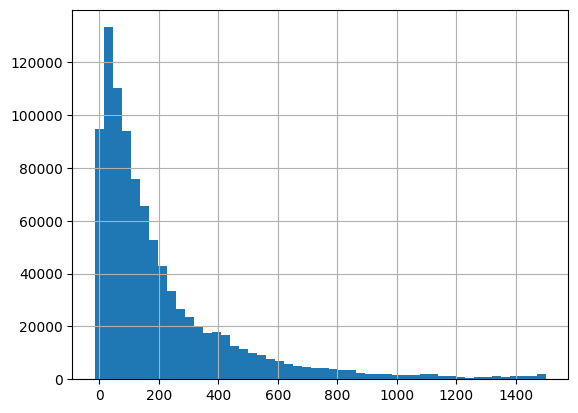

In [73]:
cdf.head()
cdf[cdf['snapshot_release_date']<= 1500]['snapshot_release_date'].hist(bins=50)

country
JP    22463
ID    22354
IN    22255
EG    21644
IL    21281
      ...  
SK    10589
MX    10330
DO     9032
CL     7771
GR     7208
Name: count, Length: 72, dtype: int64


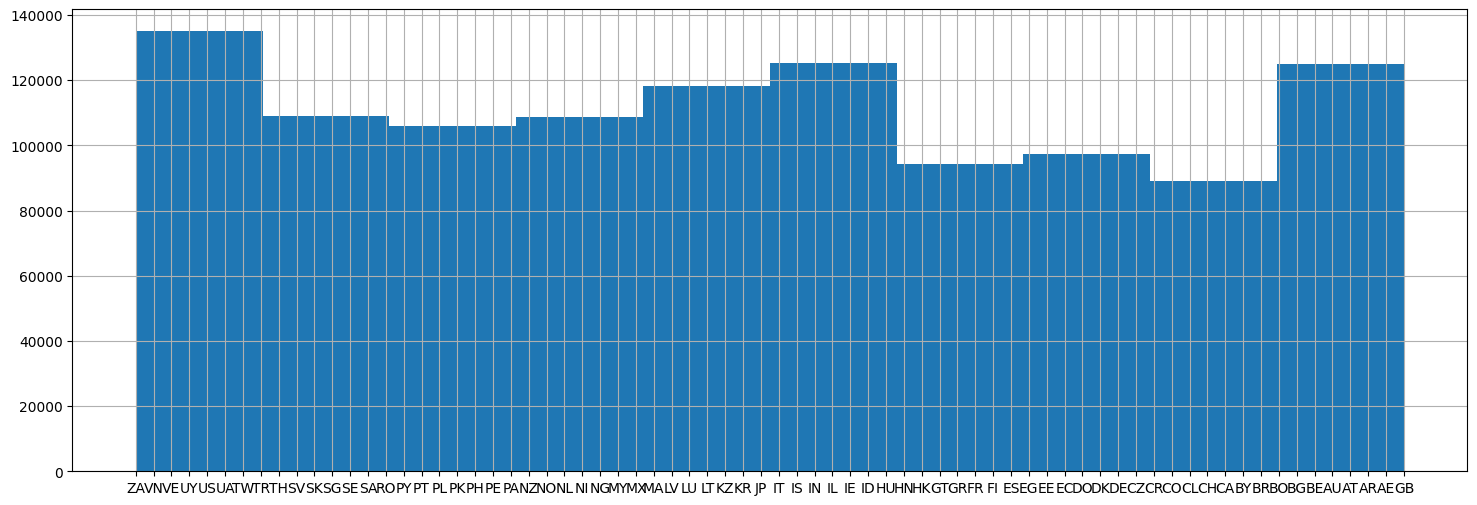

In [74]:
plt.figure(figsize = (18,6))
cdf['country'].hist()
print(cdf['country'].value_counts())

In [75]:

def func_drankweight(df):
    rank_boundary = df['daily_rank'] // 10

    conditions = [
        rank_boundary == 0,
        rank_boundary == 1,
        rank_boundary == 2,
        rank_boundary == 3,
        rank_boundary == 4
    ]
    choices = [2, 1.75, 1.5, 1.25, 1.00]

    df['drank_weight'] = np.select(conditions, choices, default=1)

    return df.head()

func_drankweight(cdf)


,sheet_name,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_release_date,snapshot_date,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,drank_weight
0,page_1,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"['Lady Gaga', 'Bruno Mars']",1.0,0.0,1.0,NaN,168.0,2025-01-31,...,-7.777,0.0,0.0304,0.30800,0.0000,0.122,0.535,157.969,3.0,2.0
1,page_1,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"['ROSÉ', 'Bruno Mars']",3.0,0.0,0.0,NaN,56.0,2025-01-31,...,-4.477,0.0,0.2600,0.02830,0.0000,0.355,0.939,149.027,4.0,2.0
2,page_1,5TFD2bmFKGhoCRbX61nXY5,NUEVAYoL,['Bad Bunny'],5.0,0.0,1.0,NaN,26.0,2025-01-31,...,-20.024,1.0,0.1390,0.26500,0.9950,0.204,0.120,137.922,4.0,2.0
3,page_1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,['Billie Eilish'],6.0,0.0,-1.0,NaN,259.0,2025-01-31,...,-10.171,1.0,0.0358,0.20000,0.0608,0.117,0.438,104.978,4.0,2.0
4,page_1,7tI8dRuH2Yc6RuoTjxo4dU,Who,['Jimin'],9.0,0.0,2.0,NaN,196.0,2025-01-31,...,-3.743,0.0,0.0320,0.00289,0.0000,0.193,0.838,116.034,4.0,2.0


In [79]:

        

def func_srweight(df):
    srd = df['snapshot_release_date']
    qr = 365 / 4

    conditions = [
        srd <= 1,
        (srd > 1) & (srd < 1 * qr),
        (srd >= 1 * qr) & (srd < 2 * qr),
        (srd >= 2 * qr) & (srd < 3 * qr),
        (srd >= 3 * qr)
    ]

    choices = [1, 1.25, 1.5, 1.75, 2]

    df['srweight'] = np.select(conditions, choices, default=2)

    return df.head()




def move_cols(df, target_col, before_col):
    cols = list(df.columns)
    cols.remove(target_col)

    idx = cols.index(before_col)

    cols.insert(idx, target_col)

    df = df[cols]

# what is more impactful variable daily_rank vs snapshot_release_date : 

func_srweight(cdf)


,sheet_name,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_release_date,snapshot_date,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,drank_weight,srweight
0,page_1,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"['Lady Gaga', 'Bruno Mars']",1.0,0.0,1.0,NaN,168.0,2025-01-31,...,0.0,0.0304,0.30800,0.0000,0.122,0.535,157.969,3.0,2.0,1.50
1,page_1,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"['ROSÉ', 'Bruno Mars']",3.0,0.0,0.0,NaN,56.0,2025-01-31,...,0.0,0.2600,0.02830,0.0000,0.355,0.939,149.027,4.0,2.0,1.25
2,page_1,5TFD2bmFKGhoCRbX61nXY5,NUEVAYoL,['Bad Bunny'],5.0,0.0,1.0,NaN,26.0,2025-01-31,...,1.0,0.1390,0.26500,0.9950,0.204,0.120,137.922,4.0,2.0,1.25
3,page_1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,['Billie Eilish'],6.0,0.0,-1.0,NaN,259.0,2025-01-31,...,1.0,0.0358,0.20000,0.0608,0.117,0.438,104.978,4.0,2.0,1.75
4,page_1,7tI8dRuH2Yc6RuoTjxo4dU,Who,['Jimin'],9.0,0.0,2.0,NaN,196.0,2025-01-31,...,0.0,0.0320,0.00289,0.0000,0.193,0.838,116.034,4.0,2.0,1.75


In [80]:
cdf['dr_sr_weight'] = cdf['drank_weight'] * cdf['srweight']

In [ ]:
cdf.groupby()

,sheet_name,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_release_date,snapshot_date,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,drank_weight,srweight,dr_sr_weight
0,page_1,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"['Lady Gaga', 'Bruno Mars']",1.0,0.0,1.0,NaN,168.0,2025-01-31,...,0.0304,0.30800,0.000000,0.1220,0.535,157.969,3.0,2.0,1.50,3.00
1,page_1,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"['ROSÉ', 'Bruno Mars']",3.0,0.0,0.0,NaN,56.0,2025-01-31,...,0.2600,0.02830,0.000000,0.3550,0.939,149.027,4.0,2.0,1.25,2.50
2,page_1,5TFD2bmFKGhoCRbX61nXY5,NUEVAYoL,['Bad Bunny'],5.0,0.0,1.0,NaN,26.0,2025-01-31,...,0.1390,0.26500,0.995000,0.2040,0.120,137.922,4.0,2.0,1.25,2.50
3,page_1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,['Billie Eilish'],6.0,0.0,-1.0,NaN,259.0,2025-01-31,...,0.0358,0.20000,0.060800,0.1170,0.438,104.978,4.0,2.0,1.75,3.50
4,page_1,7tI8dRuH2Yc6RuoTjxo4dU,Who,['Jimin'],9.0,0.0,2.0,NaN,196.0,2025-01-31,...,0.0320,0.00289,0.000000,0.1930,0.838,116.034,4.0,2.0,1.75,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121506,page_26,7DSAEUvxU8FajXtRloy8M0,Flowers,['Miley Cyrus'],43.0,7.0,0.0,AE,61.0,2023-10-18,...,0.0633,0.05840,0.000070,0.0232,0.632,118.048,4.0,1.0,1.25,1.25
1121507,page_26,6g95dK7o7vVh8ZCnDAseU5,كلام عينيه,['Sherine'],44.0,6.0,0.0,AE,1820.0,2023-10-18,...,0.0428,0.04770,0.000001,0.1930,0.745,131.931,4.0,1.0,2.00,2.00
1121508,page_26,6I3mqTwhRpn34SLVafSH7G,Ghost,['Justin Bieber'],45.0,5.0,0.0,AE,943.0,2023-10-18,...,0.0478,0.18500,0.000029,0.4150,0.441,153.960,4.0,1.0,2.00,2.00
1121509,page_26,26b3oVLrRUaaybJulow9kz,People,['Libianca'],48.0,2.0,0.0,AE,316.0,2023-10-18,...,0.0678,0.55100,0.000013,0.1020,0.693,124.357,5.0,1.0,2.00,2.00


In [ ]:
result = cdf.groupby('name')['dr_sr_weight'].sum().reset_index()
result = result.rename(columns={'dr_sr_weight': 'total_weight'})

result = result.sort_values(by='total_weight', ascending=False)
print(result)

                    name  total_weight
883   BIRDS OF A FEATHER    28992.8750
5061        Lose Control    28111.6875
1077    Beautiful Things    25302.9375
2212    Die With A Smile    23213.0000
4696                LUNA    23012.0000
...                  ...           ...
8083         Sommerflørt        1.0000
9801            Yosemite        1.0000
1620   Chasing Lightning        1.0000
2912             Fantasy        1.0000
4851          Lass es zu        1.0000

[11795 rows x 2 columns]


In [83]:
filteredctrn = cdf[cdf['country'].isna()] 
resultctrn = filteredctrn.groupby('name')['dr_sr_weight'].sum().reset_index()

resultctrn = resultctrn.rename(columns={'dr_sr_weight': 'total_weight'})

resultctrn = resultctrn.sort_values(by='total_weight', ascending=False)
print(resultctrn)

                                               name  total_weight
127                                I Wanna Be Yours      1227.500
210  One Of The Girls (with JENNIE, Lily Rose Depp)      1203.125
58                                     Cruel Summer      1200.000
171                                    Lose Control      1131.875
307                                The Night We Met      1012.000
..                                              ...           ...
234                                           Robin         1.000
360                        feelslikeimfallinginlove         1.000
309       The girl, so confusing version with lorde         1.000
50                                     Close To You         1.000
306                                  The Manuscript         1.000

[384 rows x 2 columns]


In [85]:
cdf.to_csv("spotify_top50_cleaned_weighted.csv", index=False)


In [86]:
resultctrn = filteredctrn.groupby('artists')['dr_sr_weight'].sum().reset_index()
resultctrn = resultctrn.rename(columns={'dr_sr_weight': 'total_weight_byartist'})

resultctrn = resultctrn.sort_values(by='total_weight_byartist', ascending=False)
print(resultctrn)

                                        artists  total_weight_byartist
192                            ['Taylor Swift']               2082.250
28                            ['Billie Eilish']               2025.000
9                            ['Arctic Monkeys']               1227.500
205  ['The Weeknd', 'JENNIE', 'Lily-Rose Depp']               1203.125
193                             ['Teddy Swims']               1134.125
..                                          ...                    ...
112                             ['Karan Aujla']                  1.250
13                              ['BABYMONSTER']                  1.250
77                            ['Fuerza Regida']                  1.250
46                      ['Charli xcx', 'Lorde']                  1.000
81                            ['Gracie Abrams']                  1.000

[231 rows x 2 columns]


In [88]:
tdf = pd.read_excel("/Users/ibolam/99. Projects/Abroad/01. UMD/25SPRING/25DATATHON/2022 Top Touring Artists_perShow.xlsx", sheet_name='Sheet1')
tdf


,rRank,rsRank,Artist,Revenue,Tickets Sold,Shows,TicketSold/Shows,Revenue/Shows
0,17,1,BTS,118.28,1688126,7,241160.86,16.90
1,16,2,The Rolling Stones,120.76,712541,14,50895.79,8.63
2,10,3,The Weeknd,148.68,1002435,21,47735.00,7.08
3,21,4,Paul McCartney,105.08,423659,16,26478.69,6.57
4,8,5,Red Hot Chili Peppers,177.10,1465525,31,47275.00,5.71
5,1,6,Bad Bunny,435.18,2477334,81,30584.37,5.37
6,3,7,Coldplay,342.27,3802812,64,59418.94,5.35
7,6,8,Rammstein,216.86,2192674,44,49833.50,4.93
8,9,9,Def Leppard & Motley Crue,175.51,1341035,36,37250.97,4.88
9,13,10,Garth Brooks,126.58,1575020,26,60577.69,4.87


In [ ]:

cdf['artists'] = cdf['artists'].str.strip()
cdf['artists'] = cdf['artists'].astype(str)
cdf['artists_clean'] = cdf['artists'].str.replace(r"[\[\]']", "", regex=True)
cdf


,sheet_name,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_release_date,snapshot_date,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,drank_weight,srweight,dr_sr_weight,artists_clean
0,page_1,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"['Lady Gaga', 'Bruno Mars']",1.0,0.0,1.0,NaN,168.0,2025-01-31,...,0.30800,0.000000,0.1220,0.535,157.969,3.0,2.0,1.50,3.00,"Lady Gaga, Bruno Mars"
1,page_1,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"['ROSÉ', 'Bruno Mars']",3.0,0.0,0.0,NaN,56.0,2025-01-31,...,0.02830,0.000000,0.3550,0.939,149.027,4.0,2.0,1.25,2.50,"ROSÉ, Bruno Mars"
2,page_1,5TFD2bmFKGhoCRbX61nXY5,NUEVAYoL,['Bad Bunny'],5.0,0.0,1.0,NaN,26.0,2025-01-31,...,0.26500,0.995000,0.2040,0.120,137.922,4.0,2.0,1.25,2.50,Bad Bunny
3,page_1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,['Billie Eilish'],6.0,0.0,-1.0,NaN,259.0,2025-01-31,...,0.20000,0.060800,0.1170,0.438,104.978,4.0,2.0,1.75,3.50,Billie Eilish
4,page_1,7tI8dRuH2Yc6RuoTjxo4dU,Who,['Jimin'],9.0,0.0,2.0,NaN,196.0,2025-01-31,...,0.00289,0.000000,0.1930,0.838,116.034,4.0,2.0,1.75,3.50,Jimin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121506,page_26,7DSAEUvxU8FajXtRloy8M0,Flowers,['Miley Cyrus'],43.0,7.0,0.0,AE,61.0,2023-10-18,...,0.05840,0.000070,0.0232,0.632,118.048,4.0,1.0,1.25,1.25,Miley Cyrus
1121507,page_26,6g95dK7o7vVh8ZCnDAseU5,كلام عينيه,['Sherine'],44.0,6.0,0.0,AE,1820.0,2023-10-18,...,0.04770,0.000001,0.1930,0.745,131.931,4.0,1.0,2.00,2.00,Sherine
1121508,page_26,6I3mqTwhRpn34SLVafSH7G,Ghost,['Justin Bieber'],45.0,5.0,0.0,AE,943.0,2023-10-18,...,0.18500,0.000029,0.4150,0.441,153.960,4.0,1.0,2.00,2.00,Justin Bieber
1121509,page_26,26b3oVLrRUaaybJulow9kz,People,['Libianca'],48.0,2.0,0.0,AE,316.0,2023-10-18,...,0.55100,0.000013,0.1020,0.693,124.357,5.0,1.0,2.00,2.00,Libianca


In [ ]:
cdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121511 entries, 0 to 1121510
Data columns (total 31 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   sheet_name             1121511 non-null  object        
 1   spotify_id             1121511 non-null  object        
 2   name                   1121502 non-null  object        
 3   artists                1121511 non-null  object        
 4   daily_rank             1121511 non-null  float64       
 5   daily_movement         1121511 non-null  float64       
 6   weekly_movement        1121511 non-null  float64       
 7   country                1107409 non-null  object        
 8   snapshot_release_date  1120875 non-null  float64       
 9   snapshot_date          1121511 non-null  datetime64[ns]
 10  album_release_date     1120875 non-null  datetime64[ns]
 11  popularity             1121511 non-null  float64       
 12  is_explicit            11215

In [ ]:
tdf[' Artist'] = tdf[' Artist'].str.strip()

artist_counts = cdf['artists_clean'].value_counts()
tdf[' Artist'] = tdf[' Artist'].str.strip()

tdf['number'] = tdf[' Artist'].map(artist_counts).fillna(0).astype(int)
# tdf['numberUS'] = tdf[' Artist'].map(artist_counts).fillna(0).astype(int)


tdf

,rRank,rsRank,Artist,Revenue,Tickets Sold,Shows,TicketSold/Shows,Revenue/Shows,number
0,17,1,BTS,118.28,1688126,7,241160.86,16.90,201
1,16,2,The Rolling Stones,120.76,712541,14,50895.79,8.63,9
2,10,3,The Weeknd,148.68,1002435,21,47735.00,7.08,766
3,21,4,Paul McCartney,105.08,423659,16,26478.69,6.57,601
4,8,5,Red Hot Chili Peppers,177.10,1465525,31,47275.00,5.71,31
5,1,6,Bad Bunny,435.18,2477334,81,30584.37,5.37,2441
6,3,7,Coldplay,342.27,3802812,64,59418.94,5.35,4260
7,6,8,Rammstein,216.86,2192674,44,49833.50,4.93,7
8,9,9,Def Leppard & Motley Crue,175.51,1341035,36,37250.97,4.88,0
9,13,10,Garth Brooks,126.58,1575020,26,60577.69,4.87,0


In [ ]:
dfartist_counts = pd.DataFrame(artist_counts)
dfartist_counts

dfartist_counts

,count
artists_clean,
Billie Eilish,24948
Taylor Swift,15591
Benson Boone,13574
Jimin,13500
Teddy Swims,12242
...,...
Fabiano Henrique,1
NEVRMIND,1
"Pritam, Arijit Singh, Amitabh Bhattacharya, Charan",1


In [135]:
uscdf = cdf[cdf['country']=='US']
uscdf

,sheet_name,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_release_date,snapshot_date,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,drank_weight,srweight,dr_sr_weight,artists_clean
184,page_1,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"['Lady Gaga', 'Bruno Mars']",2.0,0.0,0.0,US,168.0,2025-01-31,...,0.30800,0.000000,0.1220,0.535,157.969,3.0,2.00,1.50,3.0000,"Lady Gaga, Bruno Mars"
185,page_1,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),"['Kendrick Lamar', 'SZA']",4.0,-1.0,-1.0,US,71.0,2025-01-31,...,0.25100,0.000000,0.2480,0.576,138.008,4.0,2.00,1.25,2.5000,"Kendrick Lamar, SZA"
186,page_1,7tI8dRuH2Yc6RuoTjxo4dU,Who,['Jimin'],8.0,2.0,1.0,US,196.0,2025-01-31,...,0.00289,0.000000,0.1930,0.838,116.034,4.0,2.00,1.75,3.5000,Jimin
187,page_1,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"['ROSÉ', 'Bruno Mars']",9.0,0.0,3.0,US,56.0,2025-01-31,...,0.02830,0.000000,0.3550,0.939,149.027,4.0,2.00,1.25,2.5000,"ROSÉ, Bruno Mars"
188,page_1,2zOmS55knKWSgScYPTNmGQ,Sports car,['Tate McRae'],10.0,-3.0,40.0,US,7.0,2025-01-31,...,0.05420,0.000685,0.0946,0.874,106.986,4.0,1.75,1.25,2.1875,Tate McRae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119537,page_26,0V3wPSX9ygBnCm8psDIegu,Anti-Hero,['Taylor Swift'],45.0,5.0,0.0,US,362.0,2023-10-18,...,0.13000,0.000002,0.1420,0.533,97.008,4.0,1.00,2.00,2.0000,Taylor Swift
1119538,page_26,4pCbJC43j3gSqG6Fen6upD,Hey Driver (feat. The War and Treaty),"['Zach Bryan', 'The War and Treaty']",46.0,4.0,0.0,US,54.0,2023-10-18,...,0.49400,0.000000,0.3680,0.462,79.014,4.0,1.00,1.25,1.2500,"Zach Bryan, The War and Treaty"
1119539,page_26,5aIVCx5tnk0ntmdiinnYvw,Water,['Tyla'],47.0,3.0,0.0,US,82.0,2023-10-18,...,0.08560,0.000000,0.1370,0.519,117.187,4.0,1.00,1.25,1.2500,Tyla
1119540,page_26,4lIxdJw6W3Fg4vUIYCB0S5,Style,['Taylor Swift'],49.0,1.0,0.0,US,3278.0,2023-10-18,...,0.00253,0.001600,0.1170,0.456,95.019,4.0,1.00,2.00,2.0000,Taylor Swift


In [ ]:
def find_songs_by_artist(artist_name):
    mask = uscdf['artists_clean'].str.contains(artist_name, na=False)
    return uscdf[mask]['name'].tolist()

tdf[' Artist'] = tdf[' Artist'].str.strip()
tdf['songsname'] = tdf[' Artist'].apply(find_songs_by_artist)

tdf


,rRank,rsRank,Artist,Revenue,Tickets Sold,Shows,TicketSold/Shows,Revenue/Shows,number,songsname
0,17,1,BTS,118.28,1688126,7,241160.86,16.90,201,[]
1,16,2,The Rolling Stones,120.76,712541,14,50895.79,8.63,9,[]
2,10,3,The Weeknd,148.68,1002435,21,47735.00,7.08,766,"[Dancing In The Flames, Dancing In The Flames,..."
3,21,4,Paul McCartney,105.08,423659,16,26478.69,6.57,601,[Wonderful Christmastime - Edited Version / Re...
4,8,5,Red Hot Chili Peppers,177.10,1465525,31,47275.00,5.71,31,[]
5,1,6,Bad Bunny,435.18,2477334,81,30584.37,5.37,2441,"[NUEVAYoL, WELTiTA, NUEVAYoL, WELTiTA, NUEVAYo..."
6,3,7,Coldplay,342.27,3802812,64,59418.94,5.35,4260,[]
7,6,8,Rammstein,216.86,2192674,44,49833.50,4.93,7,[]
8,9,9,Def Leppard & Motley Crue,175.51,1341035,36,37250.97,4.88,0,[]
9,13,10,Garth Brooks,126.58,1575020,26,60577.69,4.87,0,[]


In [143]:
tdf[' Artist'] = tdf[' Artist'].str.strip()

artist_counts = uscdf['artists_clean'].value_counts()
tdf[' Artist'] = tdf[' Artist'].str.strip()

tdf['numberUS'] = tdf[' Artist'].map(artist_counts).fillna(0).astype(int)
tdf

,rRank,rsRank,Artist,Revenue,Tickets Sold,Shows,TicketSold/Shows,Revenue/Shows,number,songsname,numberUS
0,17,1,BTS,118.28,1688126,7,241160.86,16.90,201,[],0
1,16,2,The Rolling Stones,120.76,712541,14,50895.79,8.63,9,[],0
2,10,3,The Weeknd,148.68,1002435,21,47735.00,7.08,766,"[Dancing In The Flames, Dancing In The Flames,...",9
3,21,4,Paul McCartney,105.08,423659,16,26478.69,6.57,601,[Wonderful Christmastime - Edited Version / Re...,24
4,8,5,Red Hot Chili Peppers,177.10,1465525,31,47275.00,5.71,31,[],0
5,1,6,Bad Bunny,435.18,2477334,81,30584.37,5.37,2441,"[NUEVAYoL, WELTiTA, NUEVAYoL, WELTiTA, NUEVAYo...",77
6,3,7,Coldplay,342.27,3802812,64,59418.94,5.35,4260,[],0
7,6,8,Rammstein,216.86,2192674,44,49833.50,4.93,7,[],0
8,9,9,Def Leppard & Motley Crue,175.51,1341035,36,37250.97,4.88,0,[],0
9,13,10,Garth Brooks,126.58,1575020,26,60577.69,4.87,0,[],0


In [145]:
def find_songs_by_artist_dist(artist_name):
    mask = uscdf['artists_clean'].str.contains(artist_name, na=False)
    songs = uscdf[mask]['name'].unique().tolist()
    return songs

tdf[' Artist'] = tdf[' Artist'].str.strip()
tdf['songsnameUS'] = tdf[' Artist'].apply(find_songs_by_artist_dist)

In [146]:
tdf

,rRank,rsRank,Artist,Revenue,Tickets Sold,Shows,TicketSold/Shows,Revenue/Shows,number,songsname,numberUS,songsnameUS
0,17,1,BTS,118.28,1688126,7,241160.86,16.90,201,[],0,[]
1,16,2,The Rolling Stones,120.76,712541,14,50895.79,8.63,9,[],0,[]
2,10,3,The Weeknd,148.68,1002435,21,47735.00,7.08,766,"[Dancing In The Flames, Dancing In The Flames,...",9,"[Dancing In The Flames, One Of The Girls (with..."
3,21,4,Paul McCartney,105.08,423659,16,26478.69,6.57,601,[Wonderful Christmastime - Edited Version / Re...,24,[Wonderful Christmastime - Edited Version / Re...
4,8,5,Red Hot Chili Peppers,177.10,1465525,31,47275.00,5.71,31,[],0,[]
5,1,6,Bad Bunny,435.18,2477334,81,30584.37,5.37,2441,"[NUEVAYoL, WELTiTA, NUEVAYoL, WELTiTA, NUEVAYo...",77,"[NUEVAYoL, WELTiTA, CAFé CON RON, TURiSTA, PIT..."
6,3,7,Coldplay,342.27,3802812,64,59418.94,5.35,4260,[],0,[]
7,6,8,Rammstein,216.86,2192674,44,49833.50,4.93,7,[],0,[]
8,9,9,Def Leppard & Motley Crue,175.51,1341035,36,37250.97,4.88,0,[],0,[]
9,13,10,Garth Brooks,126.58,1575020,26,60577.69,4.87,0,[],0,[]


In [147]:
tdf.to_excel('tour22_withSongname_dist.xlsx')

# Selection of Songs

In [152]:
cdf

,sheet_name,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_release_date,snapshot_date,...,instrumentalness,liveness,valence,tempo,time_signature,drank_weight,srweight,dr_sr_weight,artists_clean,lower_artist_name
0,page_1,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"['Lady Gaga', 'Bruno Mars']",1.0,0.0,1.0,NaN,168.0,2025-01-31,...,0.000000,0.1220,0.535,157.969,3.0,2.0,1.50,3.00,"Lady Gaga, Bruno Mars","lady gaga, bruno mars"
1,page_1,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"['ROSÉ', 'Bruno Mars']",3.0,0.0,0.0,NaN,56.0,2025-01-31,...,0.000000,0.3550,0.939,149.027,4.0,2.0,1.25,2.50,"ROSÉ, Bruno Mars","rosé, bruno mars"
2,page_1,5TFD2bmFKGhoCRbX61nXY5,NUEVAYoL,['Bad Bunny'],5.0,0.0,1.0,NaN,26.0,2025-01-31,...,0.995000,0.2040,0.120,137.922,4.0,2.0,1.25,2.50,Bad Bunny,bad bunny
3,page_1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,['Billie Eilish'],6.0,0.0,-1.0,NaN,259.0,2025-01-31,...,0.060800,0.1170,0.438,104.978,4.0,2.0,1.75,3.50,Billie Eilish,billie eilish
4,page_1,7tI8dRuH2Yc6RuoTjxo4dU,Who,['Jimin'],9.0,0.0,2.0,NaN,196.0,2025-01-31,...,0.000000,0.1930,0.838,116.034,4.0,2.0,1.75,3.50,Jimin,jimin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121506,page_26,7DSAEUvxU8FajXtRloy8M0,Flowers,['Miley Cyrus'],43.0,7.0,0.0,AE,61.0,2023-10-18,...,0.000070,0.0232,0.632,118.048,4.0,1.0,1.25,1.25,Miley Cyrus,miley cyrus
1121507,page_26,6g95dK7o7vVh8ZCnDAseU5,كلام عينيه,['Sherine'],44.0,6.0,0.0,AE,1820.0,2023-10-18,...,0.000001,0.1930,0.745,131.931,4.0,1.0,2.00,2.00,Sherine,sherine
1121508,page_26,6I3mqTwhRpn34SLVafSH7G,Ghost,['Justin Bieber'],45.0,5.0,0.0,AE,943.0,2023-10-18,...,0.000029,0.4150,0.441,153.960,4.0,1.0,2.00,2.00,Justin Bieber,justin bieber
1121509,page_26,26b3oVLrRUaaybJulow9kz,People,['Libianca'],48.0,2.0,0.0,AE,316.0,2023-10-18,...,0.000013,0.1020,0.693,124.357,5.0,1.0,2.00,2.00,Libianca,libianca


In [ ]:
target_artist = ['justin bieber', 'dua lipa', 'harry styles', 'the weekend', 'bad bunny', 'eagles']

#cdf['artists_clean'] 의 값들은 모두 영문 str이다. 이 글자를 모두 lower case 로 바꿔서 새로운 컬럼cdf[lower_artist_name]에 넣고 싶어 
cdf['lower_artist_name'] = cdf['artists_clean'].str.lower()

grouped_df = cdf.groupby('lower_artist_name')['dr_sr_weight'].sum().reset_index()
filtered_df = grouped_df[grouped_df['lower_artist_name'].isin(target_artist)]

filtered_df.head()

,lower_artist_name,dr_sr_weight
745,bad bunny,4833.125
1919,dua lipa,11487.125
1960,eagles,306.500
2800,harry styles,3740.500
3411,justin bieber,4930.000


In [153]:
filtered_df.sort_values('dr_sr_weight')

,lower_artist_name,dr_sr_weight
1960,eagles,306.500
6746,the weeknd,1611.375
2800,harry styles,3740.500
745,bad bunny,4833.125
3411,justin bieber,4930.000
1919,dua lipa,11487.125


In [ ]:
artist_song_df = cdf.groupby(['lower_artist_name', 'name'])['dr_sr_weight'].sum().reset_index()
filtered_artist_song_df = artist_song_df[artist_song_df['lower_artist_name'].isin(target_artist)]
filtered_artist_song_df.sort_values(by = 'lower_artist_name', ascending= False)

# filtered_artist_song_df 맨 끝에다가 각 name 별로 cdf['popularity'] 평균값과 각 name별 popularity(name별로 평균내서), energy, danceability, loudness, instrumentalness 는 name 별로 그대로 뽑아내고 싶어.

,lower_artist_name,name,dr_sr_weight
10879,the weeknd,Die For You,883.0000
10878,the weeknd,Dancing In The Flames,446.3750
10877,the weeknd,Blinding Lights,282.0000
5449,justin bieber,Mistletoe,3374.5000
5448,justin bieber,Ghost,1382.5000
5447,justin bieber,Favorite Girl,173.0000
4399,harry styles,As It Was,3740.5000
3119,eagles,Please Come Home for Christmas - Single Versio...,5.0000
3118,eagles,Please Come Home for Christmas - 2013 Remaster,297.5000
3117,eagles,Hotel California - 2013 Remaster,4.0000


In [163]:
song_features = cdf.groupby('name')[['popularity', 'energy', 'danceability', 'loudness', 'instrumentalness']].mean().reset_index()
final_df = filtered_artist_song_df.merge(song_features, on='name', how='left')

max_popularity = cdf.groupby('name')['popularity'].max().reset_index()
max_popularity.rename(columns={'popularity': 'max_popularity'}, inplace=True)

final_df = final_df.merge(max_popularity, on='name', how='left')


In [ ]:
def move_column_before(df, column_to_move, reference_column):
    cols = list(df.columns)
    cols.remove(column_to_move)
    ref_index = cols.index(reference_column)
    cols.insert(ref_index, column_to_move)
    return df[cols]

In [170]:

final_df = move_column_before(final_df, 'max_popularity', 'popularity')
final_df


# final_df['max_popularity'] 를 final_df['popularity'] 앞으로 이동시키는 코드 짜줘 def 로

,lower_artist_name,name,dr_sr_weight,popularity,energy,danceability,loudness,instrumentalness,max_popularity
0,bad bunny,A Tu Merced,4.0000,75.000000,0.791000,0.860000,-4.784000,0.000106,75.0
1,bad bunny,BAILE INoLVIDABLE,86.0000,71.000000,0.003320,0.168000,-46.113000,0.790000,71.0
2,bad bunny,BOKeTE,62.0625,67.000000,0.070000,0.400000,-32.756000,0.956000,67.0
3,bad bunny,DtMF,425.8125,82.074866,0.131000,0.625000,-27.405000,0.218000,90.0
4,bad bunny,EoO,59.5000,66.000000,0.464000,0.360000,-29.598000,0.859000,66.0
5,bad bunny,KETU TeCRÉ,68.2500,68.000000,0.277000,0.270000,-32.187000,0.485000,68.0
6,bad bunny,KLOuFRENS,62.9375,67.000000,0.125000,0.326000,-32.450000,0.706000,67.0
7,bad bunny,LA MuDANZA,46.6875,64.000000,0.926000,0.565000,-5.607000,0.944000,64.0
8,bad bunny,LO QUE LE PASÓ A HAWAii,405.9375,80.486692,0.001740,0.093900,-54.341000,0.000195,86.0
9,bad bunny,NUEVAYoL,1761.3125,90.026281,0.195000,0.142000,-20.024000,0.995000,94.0


In [ ]:
cdf[cdf['name'] == 'As It Was'].iloc[:, list(range(2, 5)) + list(range(11, 20))]

,name,artists,daily_rank,popularity,is_explicit,duration_ms,album_name,danceability,energy,key,loudness,mode
438598,As It Was,['Harry Styles'],24.0,92.0,False,167303.0,Harry's House,0.52,0.731,6.0,-5.338,0.0
439047,As It Was,['Harry Styles'],45.0,92.0,False,167303.0,Harry's House,0.52,0.731,6.0,-5.338,0.0
439230,As It Was,['Harry Styles'],47.0,92.0,False,167303.0,Harry's House,0.52,0.731,6.0,-5.338,0.0
440362,As It Was,['Harry Styles'],49.0,92.0,False,167303.0,Harry's House,0.52,0.731,6.0,-5.338,0.0
441124,As It Was,['Harry Styles'],29.0,92.0,False,167303.0,Harry's House,0.52,0.731,6.0,-5.338,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1120887,As It Was,['Harry Styles'],36.0,94.0,False,167303.0,Harry's House,0.52,0.731,6.0,-5.338,0.0
1121206,As It Was,['Harry Styles'],35.0,94.0,False,167303.0,Harry's House,0.52,0.731,6.0,-5.338,0.0
1121375,As It Was,['Harry Styles'],34.0,94.0,False,167303.0,Harry's House,0.52,0.731,6.0,-5.338,0.0
1121404,As It Was,['Harry Styles'],30.0,94.0,False,167303.0,Harry's House,0.52,0.731,6.0,-5.338,0.0


In [192]:
final_df_concert = final_df[
    (final_df['popularity'] > 80) &  # High popularity
    (final_df['energy'] > 0.7) &  # High energy
    (final_df['danceability'] > 0.5) &  # dancing
    (final_df['loudness'] > -6) &  # Loud enough for live performances
    (final_df['instrumentalness'] < 0.3)]  # Primarily vocal performances

final_df_concert

,lower_artist_name,name,dr_sr_weight,popularity,energy,danceability,loudness,instrumentalness,max_popularity
14,dua lipa,Dance The Night - From Barbie The Album,2800.8750,93.239880,0.845,0.67100,-4.930000,0.000000,95.0
15,dua lipa,Houdini,6026.6875,91.833706,0.789,0.74400,-4.876000,0.001440,95.0
21,harry styles,As It Was,3740.5000,92.812694,0.731,0.52000,-5.338000,0.001010,95.0
23,justin bieber,Ghost,1382.5000,87.970093,0.741,0.60100,-5.569000,0.000029,90.0
25,the weeknd,Blinding Lights,282.0000,91.300752,0.730,0.51394,-5.934361,0.000095,93.0


In [ ]:

final4_df = final_df[~final_df['lower_artist_name'].isin(['bad bunny', 'eagles'])]
final4_df


,lower_artist_name,name,dr_sr_weight,popularity,energy,danceability,loudness,instrumentalness,max_popularity
14,dua lipa,Dance The Night - From Barbie The Album,2800.8750,93.239880,0.845000,0.671000,-4.930000,0.000000,95.0
15,dua lipa,Houdini,6026.6875,91.833706,0.789000,0.744000,-4.876000,0.001440,95.0
16,dua lipa,Illusion,331.6875,74.779279,0.771676,0.678928,-4.720279,0.000003,88.0
17,dua lipa,Training Season,2327.8750,86.173791,0.583303,0.814218,-4.495568,0.000002,92.0
21,harry styles,As It Was,3740.5000,92.812694,0.731000,0.520000,-5.338000,0.001010,95.0
22,justin bieber,Favorite Girl,173.0000,78.307692,0.681000,0.581000,-4.469000,0.000000,80.0
23,justin bieber,Ghost,1382.5000,87.970093,0.741000,0.601000,-5.569000,0.000029,90.0
24,justin bieber,Mistletoe,3374.5000,86.996610,0.559899,0.657369,-9.052629,0.000000,92.0
25,the weeknd,Blinding Lights,282.0000,91.300752,0.730000,0.513940,-5.934361,0.000095,93.0
26,the weeknd,Dancing In The Flames,446.3750,71.141304,0.730000,0.552000,-6.203000,0.000000,86.0


In [ ]:
album_relase_d = cdf.groupby('name')['album_release_date'].mean().reset_index()
final4_df = final4_df.merge(album_relase_d, on='name', how='left')

final4_df

,lower_artist_name,name,dr_sr_weight,popularity,energy,danceability,loudness,instrumentalness,max_popularity,album_release_date
0,dua lipa,Dance The Night - From Barbie The Album,2800.8750,93.239880,0.845000,0.671000,-4.930000,0.000000,95.0,2023-05-25 00:00:00.000000000
1,dua lipa,Houdini,6026.6875,91.833706,0.789000,0.744000,-4.876000,0.001440,95.0,2023-11-12 03:30:02.872645888
2,dua lipa,Illusion,331.6875,74.779279,0.771676,0.678928,-4.720279,0.000003,88.0,2024-04-16 08:25:56.756756736
3,dua lipa,Training Season,2327.8750,86.173791,0.583303,0.814218,-4.495568,0.000002,92.0,2024-03-05 18:53:13.833216768
4,harry styles,As It Was,3740.5000,92.812694,0.731000,0.520000,-5.338000,0.001010,95.0,2022-05-20 00:00:00.000000256
5,justin bieber,Favorite Girl,173.0000,78.307692,0.681000,0.581000,-4.469000,0.000000,80.0,2009-01-01 00:00:00.000000000
6,justin bieber,Ghost,1382.5000,87.970093,0.741000,0.601000,-5.569000,0.000029,90.0,2021-03-19 00:00:00.000000000
7,justin bieber,Mistletoe,3374.5000,86.996610,0.559899,0.657369,-9.052629,0.000000,92.0,2011-01-02 19:20:32.542372864
8,the weeknd,Blinding Lights,282.0000,91.300752,0.730000,0.513940,-5.934361,0.000095,93.0,2020-03-20 00:00:00.000000000
9,the weeknd,Dancing In The Flames,446.3750,71.141304,0.730000,0.552000,-6.203000,0.000000,86.0,2024-09-13 00:00:00.000000000


In [202]:
final4_df['album_release_date'] = final4_df['album_release_date'].dt.date
final4_df

,lower_artist_name,name,dr_sr_weight,popularity,energy,danceability,loudness,instrumentalness,max_popularity,album_release_date
0,dua lipa,Dance The Night - From Barbie The Album,2800.8750,93.239880,0.845000,0.671000,-4.930000,0.000000,95.0,2023-05-25
1,dua lipa,Houdini,6026.6875,91.833706,0.789000,0.744000,-4.876000,0.001440,95.0,2023-11-12
2,dua lipa,Illusion,331.6875,74.779279,0.771676,0.678928,-4.720279,0.000003,88.0,2024-04-16
3,dua lipa,Training Season,2327.8750,86.173791,0.583303,0.814218,-4.495568,0.000002,92.0,2024-03-05
4,harry styles,As It Was,3740.5000,92.812694,0.731000,0.520000,-5.338000,0.001010,95.0,2022-05-20
5,justin bieber,Favorite Girl,173.0000,78.307692,0.681000,0.581000,-4.469000,0.000000,80.0,2009-01-01
6,justin bieber,Ghost,1382.5000,87.970093,0.741000,0.601000,-5.569000,0.000029,90.0,2021-03-19
7,justin bieber,Mistletoe,3374.5000,86.996610,0.559899,0.657369,-9.052629,0.000000,92.0,2011-01-02
8,the weeknd,Blinding Lights,282.0000,91.300752,0.730000,0.513940,-5.934361,0.000095,93.0,2020-03-20
9,the weeknd,Dancing In The Flames,446.3750,71.141304,0.730000,0.552000,-6.203000,0.000000,86.0,2024-09-13


In [ ]:
final4_df.sort_values(by=['lower_artist_name', 'dr_sr_weight'], ascending=[True, False])


,lower_artist_name,name,dr_sr_weight,popularity,energy,danceability,loudness,instrumentalness,max_popularity,album_release_date
1,dua lipa,Houdini,6026.6875,91.833706,0.789000,0.744000,-4.876000,0.001440,95.0,2023-11-12
0,dua lipa,Dance The Night - From Barbie The Album,2800.8750,93.239880,0.845000,0.671000,-4.930000,0.000000,95.0,2023-05-25
3,dua lipa,Training Season,2327.8750,86.173791,0.583303,0.814218,-4.495568,0.000002,92.0,2024-03-05
2,dua lipa,Illusion,331.6875,74.779279,0.771676,0.678928,-4.720279,0.000003,88.0,2024-04-16
4,harry styles,As It Was,3740.5000,92.812694,0.731000,0.520000,-5.338000,0.001010,95.0,2022-05-20
7,justin bieber,Mistletoe,3374.5000,86.996610,0.559899,0.657369,-9.052629,0.000000,92.0,2011-01-02
6,justin bieber,Ghost,1382.5000,87.970093,0.741000,0.601000,-5.569000,0.000029,90.0,2021-03-19
5,justin bieber,Favorite Girl,173.0000,78.307692,0.681000,0.581000,-4.469000,0.000000,80.0,2009-01-01
10,the weeknd,Die For You,883.0000,89.899160,0.525000,0.586000,-7.163000,0.000000,91.0,2016-11-24
9,the weeknd,Dancing In The Flames,446.3750,71.141304,0.730000,0.552000,-6.203000,0.000000,86.0,2024-09-13


In [215]:
final4_df_concert = final4_df[
    (final4_df['popularity'] > 0) &  # High popularity
    (final4_df['energy'] > 0.7) &  # High energy
    (final4_df['danceability'] > 0.5) &  # dancing
    (final4_df['loudness'] > -6) &  # Loud enough for live performances
    (final4_df['instrumentalness'] < 0.3)]  # Primarily vocal performances

final4_df_concert

,lower_artist_name,name,dr_sr_weight,popularity,energy,danceability,loudness,instrumentalness,max_popularity,album_release_date
0,dua lipa,Dance The Night - From Barbie The Album,2800.8750,93.239880,0.845000,0.671000,-4.930000,0.000000,95.0,2023-05-25
1,dua lipa,Houdini,6026.6875,91.833706,0.789000,0.744000,-4.876000,0.001440,95.0,2023-11-12
2,dua lipa,Illusion,331.6875,74.779279,0.771676,0.678928,-4.720279,0.000003,88.0,2024-04-16
4,harry styles,As It Was,3740.5000,92.812694,0.731000,0.520000,-5.338000,0.001010,95.0,2022-05-20
6,justin bieber,Ghost,1382.5000,87.970093,0.741000,0.601000,-5.569000,0.000029,90.0,2021-03-19
8,the weeknd,Blinding Lights,282.0000,91.300752,0.730000,0.513940,-5.934361,0.000095,93.0,2020-03-20


In [218]:


song_features = cdf.groupby('name')[['tempo', 'valence', 'acousticness']].mean().reset_index()
final4_df = final4_df.merge(song_features, on='name', how='left')
final4_df

,lower_artist_name,name,dr_sr_weight,popularity,energy,danceability,loudness,instrumentalness,max_popularity,album_release_date,tempo,valence,acousticness
0,dua lipa,Dance The Night - From Barbie The Album,2800.8750,93.239880,0.845000,0.671000,-4.930000,0.000000,95.0,2023-05-25,110.056000,0.775000,0.020700
1,dua lipa,Houdini,6026.6875,91.833706,0.789000,0.744000,-4.876000,0.001440,95.0,2023-11-12,116.985000,0.866000,0.003600
2,dua lipa,Illusion,331.6875,74.779279,0.771676,0.678928,-4.720279,0.000003,88.0,2024-04-16,126.963928,0.709360,0.027549
3,dua lipa,Training Season,2327.8750,86.173791,0.583303,0.814218,-4.495568,0.000002,92.0,2024-03-05,123.032868,0.669175,0.036083
4,harry styles,As It Was,3740.5000,92.812694,0.731000,0.520000,-5.338000,0.001010,95.0,2022-05-20,173.930000,0.662000,0.342000
5,justin bieber,Favorite Girl,173.0000,78.307692,0.681000,0.581000,-4.469000,0.000000,80.0,2009-01-01,176.034000,0.634000,0.047200
6,justin bieber,Ghost,1382.5000,87.970093,0.741000,0.601000,-5.569000,0.000029,90.0,2021-03-19,153.960000,0.441000,0.185000
7,justin bieber,Mistletoe,3374.5000,86.996610,0.559899,0.657369,-9.052629,0.000000,92.0,2011-01-02,161.992950,0.854023,0.497978
8,the weeknd,Blinding Lights,282.0000,91.300752,0.730000,0.513940,-5.934361,0.000095,93.0,2020-03-20,171.004759,0.334000,0.001458
9,the weeknd,Dancing In The Flames,446.3750,71.141304,0.730000,0.552000,-6.203000,0.000000,86.0,2024-09-13,116.875000,0.162000,0.001100


In [255]:
df_slow = final4_df[
    (final4_df['energy'] < 0.5) &               # Low energy = more mellow
    (final4_df['tempo'] < 90) &             # Slower tempo
    (final4_df['valence'] >= 0.2) & (final4_df['valence'] <= 0.5) &   # Emotional range
    (final4_df['acousticness'] > 0.2) &      # More acoustic feel
    (final4_df['instrumentalness'] < 0.3)       # Still primarily vocal
]

df_slow

,lower_artist_name,name,dr_sr_weight,popularity,energy,danceability,loudness,instrumentalness,max_popularity,album_release_date,tempo,valence,acousticness


In [212]:
final4_df

,lower_artist_name,name,dr_sr_weight,popularity,energy,danceability,loudness,instrumentalness,max_popularity,album_release_date
0,dua lipa,Dance The Night - From Barbie The Album,2800.8750,93.239880,0.845000,0.671000,-4.930000,0.000000,95.0,2023-05-25
1,dua lipa,Houdini,6026.6875,91.833706,0.789000,0.744000,-4.876000,0.001440,95.0,2023-11-12
2,dua lipa,Illusion,331.6875,74.779279,0.771676,0.678928,-4.720279,0.000003,88.0,2024-04-16
3,dua lipa,Training Season,2327.8750,86.173791,0.583303,0.814218,-4.495568,0.000002,92.0,2024-03-05
4,harry styles,As It Was,3740.5000,92.812694,0.731000,0.520000,-5.338000,0.001010,95.0,2022-05-20
5,justin bieber,Favorite Girl,173.0000,78.307692,0.681000,0.581000,-4.469000,0.000000,80.0,2009-01-01
6,justin bieber,Ghost,1382.5000,87.970093,0.741000,0.601000,-5.569000,0.000029,90.0,2021-03-19
7,justin bieber,Mistletoe,3374.5000,86.996610,0.559899,0.657369,-9.052629,0.000000,92.0,2011-01-02
8,the weeknd,Blinding Lights,282.0000,91.300752,0.730000,0.513940,-5.934361,0.000095,93.0,2020-03-20
9,the weeknd,Dancing In The Flames,446.3750,71.141304,0.730000,0.552000,-6.203000,0.000000,86.0,2024-09-13


In [206]:
justin_df = cdf[cdf['lower_artist_name']=='justin bieber']
justin_df.groupby('name')['popularity'].mean()

name
Favorite Girl    78.307692
Ghost            87.970093
Mistletoe        86.996610
Name: popularity, dtype: float64